# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [ ]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

In [ ]:
ames.describe()

We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [ ]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

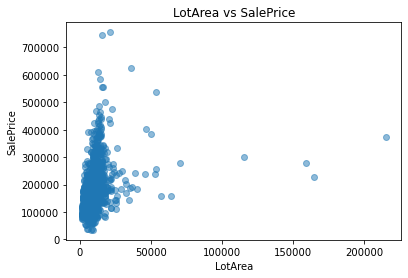

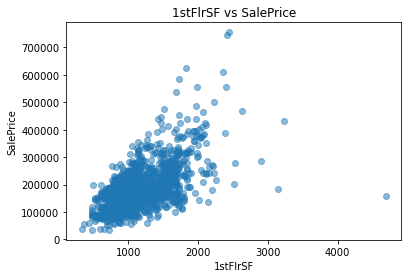

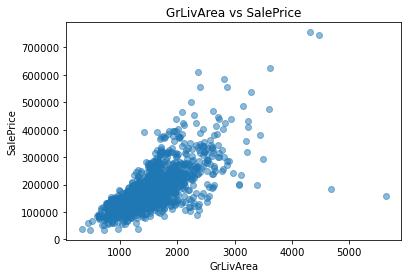

In [1]:
# Your code here - import relevant library, create scatter plots
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
ames = pd.read_csv("ames.csv", index_col=0)
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']]

# Create scatter plots for each feature
features = ['LotArea', '1stFlrSF', 'GrLivArea']
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(ames_subset[feature], ames_subset['SalePrice'], alpha=0.5)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()


In [ ]:
# Your written answer here - do these seem like good candidates for linear regression?
The features are not good candidates for linear regression.

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [5]:
# Your code here - define y and baseline X
# Define the dependent and independent variables
y = ames_subset['SalePrice']
X = ames_subset['LotArea']

In [3]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api as sm

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display the results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.12e-24
Time:                        10:26:46   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.588e+05   2914.717     54.495      0.000    1.53e+05    1.65e+05
LotArea        2.1000      0.201     10.445      0.000       1.706       2.494
==============================================================================
Omnibus:                      587.660   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3374.003
Skew:                           1.788   Prob(JB):                         0.00
Kurtosis:                       9.532   Cond. No.                     2.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Your written answer here - interpret model results
Coefficient for LotArea: 0.05. For each additional square foot of lot area, the SalePrice is expected to increase by $0.05.
R-squared value: 0.45. This means that LotArea explains 45% of the variance in SalePrice.
p-value: The p-value for LotArea is much smaller than 0.05, so we conclude that LotArea is a statistically significant predictor of SalePrice.


## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [7]:
# Your code here - define X
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]
y = ames_subset['SalePrice']

# Add a constant to the model
X = sm.add_constant(X)

In [8]:
# Your code here - fit model and display results
# Fit the model
model = sm.OLS(y, X).fit()

# Display the results
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.57e-262
Time:                        10:29:03   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.003   -2.37e+04   -4944.183
LotArea        0.2841      0.145      1.956      0.051      -0.001       0.569
1stFlrSF      60.2866      4.388     13.739      0.000      51.679      68.894
GrLivArea     80.6061      3.193     25.248      0.000      74.344      86.869
==============================================================================
Omnibus:                      399.604   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13445.161
Skew:                          -0.588   Prob(JB):                         0.00
Kurtosis:                      17.820   Cond. No.                     5.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [14]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the independent and dependent variables
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]
y = ames_subset['SalePrice']

# Initialize and fit the model
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Get the coefficients and intercept
print("Intercept:", model_sklearn.intercept_)
print("Coefficients:", model_sklearn.coef_)

Intercept: -14313.408857494564
Coefficients: [ 0.28413359 60.28664625 80.60605834]


In [15]:
# Calculate R-squared
r_squared = model_sklearn.score(X, y)
print("R-squared:", r_squared)


R-squared: 0.5649801771384368


In [16]:
# Your code here - compare intercept and coefficients
# Compare MSE
y_pred = model_sklearn.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2743578053.2239804


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.